In [2]:
# import required python libraries
import geopandas as gpd # for geo-data structure
import numpy as np # for some operation better done with numpy
import matplotlib.pyplot as plt # for creating plots
import shapely.geometry # for geometry data crunching
from shapely.geometry import Point # specifically for point geometry data manipulation
#import keplergl
#from keplergl import KeplerGl
import pandas as pd
crs = {'init': 'epsg:4326'}
from shapely.geometry import Point
import mpl_toolkits
import seaborn as sns
import uuid

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
#importing the validated govt & osm dataset
df = pd.read_csv('d2/mn_gov_osm.csv',low_memory=False,encoding='utf-8')

In [4]:
#viewing
df.head(1)

,Unnamed: 0.1,giga_id_school,Unnamed: 0,Unnamed: 1,school_id,school_name,school_name_eng,education_level,latitude,longitude,...,tile_id,top,left,bottom,right,original_index,conf_efficientnet,conf_yolov5,conf_detr,location_type
0,0.0,b1d64003-2032-3df7-9025-b30a2240d41a,Монгол улс,Rural,39630.0,Архангай аймгийн Батцэнгэл сумын ерөнхий болов...,"General school of Battsengel, Arkhangai province",High school,47.793282,101.973651,...,gov_1,47.794209,101.972271,47.792355,101.975031,0,0.998944,0.834376,0.97839,1.0


In [5]:
# looking at the columns
df.columns

Index(['Unnamed: 0.1', 'giga_id_school', 'Unnamed: 0', 'Unnamed: 1',
       'school_id', 'school_name', 'school_name_eng', 'education_level',
       'latitude', 'longitude', 'internet_availability', 'internet_type',
       'internet_speed_Mbps', 'electricity_availability',
       'computer_availability', 'school_year', 'school_region', 'admin_1',
       'admin_2', 'admin_3', 'admin_4', 'school_ownership', 'electricity_type',
       'country', 'country_code', 'source', 'location_id', 'hex8', 'lat_110',
       'long_110', 'len_long', 'len_lat', 'school_density', 'dup0', 'dupx',
       'dup1', 'dup2', 'dup3', 'dup', 'dup_id', 'missing_school_name_flag',
       'missing_education_level_flag', 'missing_internet_availability_flag',
       'missing_internet_type_flag', 'internet_speed_outlier_flag',
       'missing_internet_speed_Mbps_flag', 'school_density_outlier_flag',
       'len_long_scale', 'len_lat_scale', 'dup_id_scale', 'dup_scale',
       'missing_school_name_flag_scale', 'school_de

In [7]:
# dropping OSM that overlaps with govt data points
mn = df[(df['source'] == 'osm') & (df['location_type'] == 0)].index
df.drop(mn , inplace=True)
df.head()

,Unnamed: 0.1,giga_id_school,Unnamed: 0,Unnamed: 1,school_id,school_name,school_name_eng,education_level,latitude,longitude,...,tile_id,top,left,bottom,right,original_index,conf_efficientnet,conf_yolov5,conf_detr,location_type
0,0.0,b1d64003-2032-3df7-9025-b30a2240d41a,Монгол улс,Rural,39630.0,Архангай аймгийн Батцэнгэл сумын ерөнхий болов...,"General school of Battsengel, Arkhangai province",High school,47.793282,101.973651,...,gov_1,47.794209,101.972271,47.792355,101.975031,0,0.998944,0.834376,0.978390,1.0
1,1.0,223c0187-50a2-3632-a33d-34e4a9d6cbec,Монгол улс,Rural,39631.0,Архангай аймгийн Булган сумын ерөнхий боловсро...,"General school of Bulgan, Arkhangai province",Secondary school,47.317677,101.114628,...,gov_2,47.318612,101.113248,47.316742,101.116008,1,0.312499,0.000000,0.957021,1.0
2,2.0,971ff73a-eb00-3bff-9891-a796edeed379,Монгол улс,Rural,40119.0,Архангай аймгийн Жаргалант сумын Бага сургууль,"Elemantary school of Jargalant, Arkhangai prov...",Primary school,48.724390,100.767651,...,gov_3,48.725300,100.766271,48.723480,100.769031,2,0.999789,0.881324,0.739143,1.0
3,3.0,d2bd9977-ea0e-3f5d-8100-ba04dfcd1f17,Монгол улс,Rural,39633.0,Архангай аймгийн Жаргалант сумын ерөнхий болов...,"General school of Jargalan, Arkhangai province",High school,48.724918,100.768035,...,gov_4,48.725828,100.766655,48.724008,100.769415,3,0.999920,0.865071,0.975385,1.0
4,4.0,43e4bd41-f5ac-3a9f-b8f2-78c92bae1014,Монгол улс,Rural,39632.0,Архангай аймгийн Ихтамир сумын ерөнхий боловср...,"General school of Ikhtamir, Arkhangai province",High school,47.594792,101.205852,...,gov_5,47.595722,101.204472,47.593861,101.207232,4,0.999999,0.745825,0.981121,1.0


In [8]:
df.shape

(1033, 64)

In [9]:
mn.shape

(0,)

In [10]:
osm= df[df['source'] == 'osm']

In [11]:
osm.shape

(190, 64)

In [12]:
govt= df[df['source'] == 'government']

In [13]:
govt.shape

(843, 64)

In [14]:
govt.to_csv('d2/govt.csv', encoding='utf-8')

In [15]:
df['location_type'].value_counts()

1.0    843
0.0    190
Name: location_type, dtype: int64

In [16]:
df['class'] = np.where((df['source'] == 'osm'), 'OSM', 'GOVT')

In [17]:
df['location_type'] = np.where((df['conf_yolov5']==0) & (df['conf_detr']==0), 0, 1)

In [18]:
df.shape

(1033, 65)

In [19]:
df.to_csv('d2/mn_v2.csv', encoding='utf-8')

In [20]:
d = pd.read_csv('d2/mn_merged_v2.csv',low_memory=False,encoding='utf-8')

In [21]:
d['location_type'].value_counts()

1    849
0    184
Name: location_type, dtype: int64

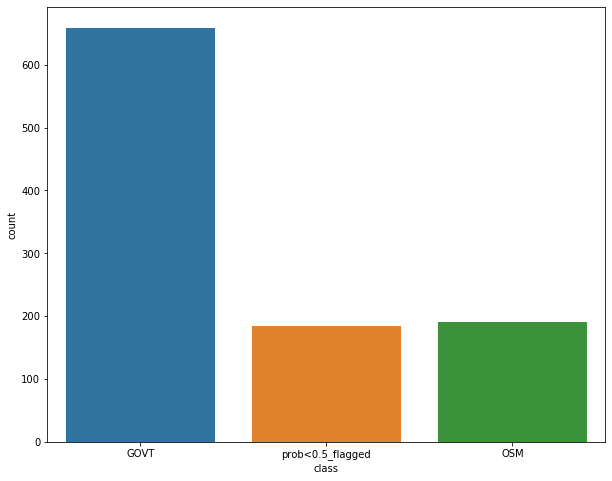

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x ='class', data = d)

In [23]:
print(d['class'].value_counts())
print(d.shape)

GOVT                659
OSM                 190
prob<0.5_flagged    184
Name: class, dtype: int64
(1033, 66)


In [24]:
d.shape

(1033, 66)

In [25]:
df1 = d.copy()

In [26]:
# add giga ids

list_unique_id = []
for i in range(0, len(df1)):
    uid = str(uuid.uuid3(uuid.NAMESPACE_DNS, (str(df1['school_id'][i])+ str(df1['school_name'][i])  + str(df1['latitude'][i]) + str(df1['longitude'][i]))))
    list_unique_id.append(uid)              
df1['giga_id_school'] = list_unique_id


In [27]:
merged_data = df1.copy()

In [28]:
# add giga_school_id_seq

merged_data['giga_school_id_seq'] = np.arange(len(merged_data)) + 1
merged_data['country_code'] = 'MN'
list_hex_res = []
for i in range(0, len(merged_data)):
    h = ("GOVT_OSM_" + merged_data['country_code'][0] + "_" + merged_data['giga_school_id_seq'].iloc[i].astype('str').zfill(6)) #Based on school agg count 
    list_hex_res.append(h)
merged_data['giga_school_id_seq'] = list_hex_res

In [29]:
merged_data.tail()

,Unnamed: 0,Unnamed: 0.1,giga_id_school,Unnamed: 0.1.1,Unnamed: 1,school_id,school_name,school_name_eng,education_level,latitude,...,left,bottom,right,original_index,conf_efficientnet,conf_yolov5,conf_detr,location_type,class,giga_school_id_seq
1028,1722,NaN,feec203a-6db6-318b-9323-fb438b22fb8c,NaN,NaN,NaN,NaN,NaN,NaN,46.251986,...,109.424727,46.251032,109.427487,879,0.999963,0.293831,0.994772,1,OSM,GOVT_OSM_MN_001029
1029,1725,NaN,6f52a65a-46fe-367d-ab33-044602050973,NaN,NaN,NaN,NaN,NaN,NaN,47.334954,...,110.662167,47.334019,110.664927,882,0.999802,0.838031,0.985059,1,OSM,GOVT_OSM_MN_001030
1030,1733,NaN,1ba19ffd-3fe6-3765-a2ac-c33e7f7d6fc8,NaN,NaN,NaN,NaN,NaN,NaN,45.727235,...,112.353008,45.726272,112.355768,890,0.000199,0.000000,0.586021,1,OSM,GOVT_OSM_MN_001031
1031,1734,NaN,570cd6d6-a224-3b93-b674-cd61b510a3e5,NaN,NaN,NaN,NaN,NaN,NaN,45.726177,...,112.356514,45.725214,112.359274,891,0.999954,0.820256,0.995463,1,OSM,GOVT_OSM_MN_001032
1032,1737,NaN,89e375fa-f010-3e90-b6a9-11fb9e2c08a9,NaN,NaN,NaN,NaN,NaN,NaN,46.679416,...,113.278105,46.678469,113.280865,894,0.001131,0.492900,0.912057,1,OSM,GOVT_OSM_MN_001033


In [30]:
#Use giga_school_id as temp school ids for those with no school ids (the ML data points)
merged_data['school_id'] = merged_data['school_id'].fillna(merged_data['giga_id_school'])

In [31]:
merged_data.to_csv("d2/mongolia_merged_new.csv", index = False)

In [32]:
merged_data.head()

,Unnamed: 0,Unnamed: 0.1,giga_id_school,Unnamed: 0.1.1,Unnamed: 1,school_id,school_name,school_name_eng,education_level,latitude,...,left,bottom,right,original_index,conf_efficientnet,conf_yolov5,conf_detr,location_type,class,giga_school_id_seq
0,0,0.0,420a67c2-79c8-37f4-8695-615a51cfa4dc,Монгол улс,Rural,39630.0,Архангай аймгийн Батцэнгэл сумын ерөнхий болов...,"General school of Battsengel, Arkhangai province",High school,47.793282,...,101.972271,47.792355,101.975031,0,0.998944,0.834376,0.978390,1,GOVT,GOVT_OSM_MN_000001
1,1,1.0,3da70e7b-76a7-3635-9fdd-7c908ca8e8af,Монгол улс,Rural,39631.0,Архангай аймгийн Булган сумын ерөнхий боловсро...,"General school of Bulgan, Arkhangai province",Secondary school,47.317677,...,101.113248,47.316742,101.116008,1,0.312499,0.000000,0.957021,1,GOVT,GOVT_OSM_MN_000002
2,2,2.0,6a5347f4-bda9-374e-9306-1c0ffed5dab9,Монгол улс,Rural,40119.0,Архангай аймгийн Жаргалант сумын Бага сургууль,"Elemantary school of Jargalant, Arkhangai prov...",Primary school,48.724390,...,100.766271,48.723480,100.769031,2,0.999789,0.881324,0.739143,1,GOVT,GOVT_OSM_MN_000003
3,3,3.0,11062878-f388-38ac-8db1-7005c5c0870f,Монгол улс,Rural,39633.0,Архангай аймгийн Жаргалант сумын ерөнхий болов...,"General school of Jargalan, Arkhangai province",High school,48.724918,...,100.766655,48.724008,100.769415,3,0.999920,0.865071,0.975385,1,GOVT,GOVT_OSM_MN_000004
4,4,4.0,934df6bb-c292-387b-971a-9aff6a225772,Монгол улс,Rural,39632.0,Архангай аймгийн Ихтамир сумын ерөнхий боловср...,"General school of Ikhtamir, Arkhangai province",High school,47.594792,...,101.204472,47.593861,101.207232,4,0.999999,0.745825,0.981121,1,GOVT,GOVT_OSM_MN_000005


# Latest dataset from Mongolia

In [33]:
mn_gis = pd.read_csv('d2/mn_latest.csv',low_memory=False,encoding='utf-8')

In [34]:
mn_gis.head()

,school_id,school_name,education_level,BUILDING_ID,BUILDING_NAME,longitude,latitude,Internet_availibility,internet_type,school_region,SOUM_DISTRICT_NAME,BAG_KHOROO_NAME,school_type,LOCATION_TYPE,class_room_count,LAST_UPDATED_BY,LAST_UPDATE_DATE
0,39884.0,Сүхбаатар аймгийн ерөнхий боловсролын лаборато...,High school,350,1-р байр,113.283920,46.681740,Yes,FTPCABLE,Сүхбаатар,Баруун-Урт,7-р баг,Government,PROVINCE,26.0,GS3210110030,36:59.0
1,39884.0,Сүхбаатар аймгийн ерөнхий боловсролын лаборато...,High school,"100,000,080,551,745",2-р байр,113.284133,46.682344,Yes,UTPCABLE,Сүхбаатар,Баруун-Урт,7-р баг,Government,PROVINCE,8.0,GS3210110030,55:42.0
2,40285.0,Нийслэлийн ерөнхий боловсролын Чандмань эрдэнэ...,High school,"100,000,942,193,313",дотуур байр,107.249070,47.772220,No,Not connected,Улаанбаатар,Налайх,7-р хороо,"Private, Mongolian citizenship owner",CAPITAL_CITY,NaN,GS3210110002,14:53.0
3,40285.0,Нийслэлийн ерөнхий боловсролын Чандмань эрдэнэ...,High school,815,Чандмань-Эрдэнэ,107.249800,47.771820,No,Not connected,Улаанбаатар,Налайх,7-р хороо,"Private, Mongolian citizenship owner",CAPITAL_CITY,10.0,GS3210110002,06:24.0
4,43861.0,158-р цэцэрлэг,Kindergarten,"100,000,289,478,487",Цэцэрлэгийн байр,106.805681,47.960280,No,Not connected,Улаанбаатар,Сонгинохайрхан,24-р хороо,Government,CAPITAL_CITY,9.0,GS3210110013,42:14.0


In [35]:
mn_gis.columns

Index(['school_id', 'school_name', 'education_level', 'BUILDING_ID',
       'BUILDING_NAME', 'longitude', 'latitude', 'Internet_availibility',
       'internet_type', 'school_region', 'SOUM_DISTRICT_NAME',
       'BAG_KHOROO_NAME', 'school_type', 'LOCATION_TYPE', 'class_room_count',
       'LAST_UPDATED_BY', 'LAST_UPDATE_DATE'],
      dtype='object')

In [39]:
osm_overlap = pd.read_csv('d2/overlap_300m.csv',low_memory=False,encoding='utf-8')

In [40]:
osm_overlap.shape

(208, 88)

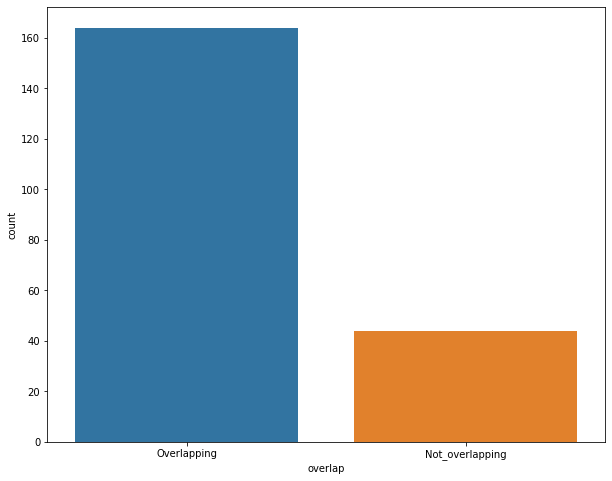

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x ='overlap', data = osm_overlap)

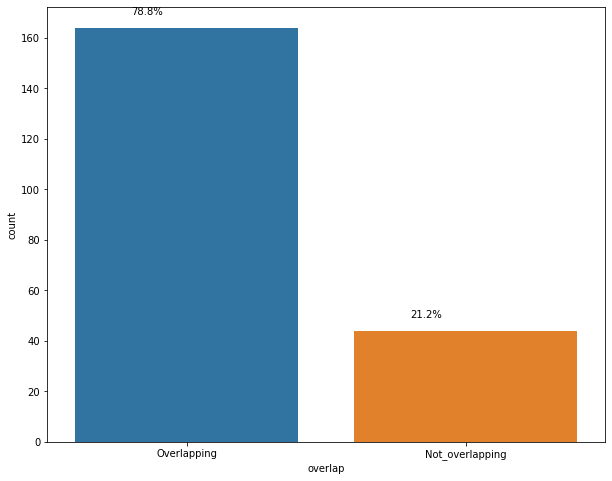

In [42]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x ='overlap', data = osm_overlap)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(osm_overlap)), (p.get_x()+0.2, p.get_height()+5))

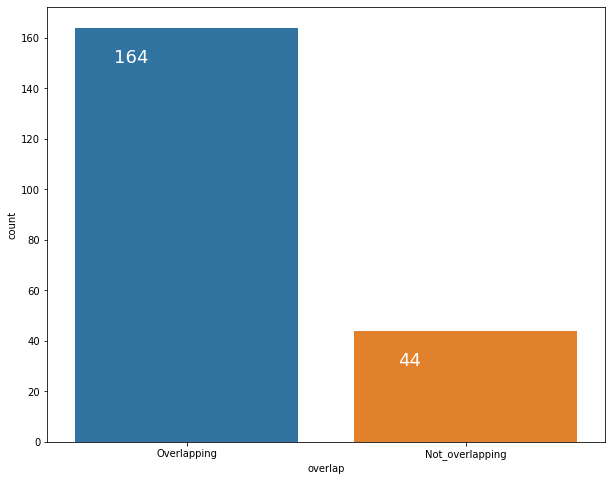

In [43]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x ='overlap', data = osm_overlap)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In [44]:
osm_overlap['prob'] = np.where((osm_overlap['conf_yolov5']<0.5) & (osm_overlap['conf_detr']<0.5), 'Low', 'High')


In [45]:
osm_no_overlap = osm_overlap[osm_overlap['overlap']=='Not_overlapping']

In [46]:
osm_no_overlap.shape

(44, 89)

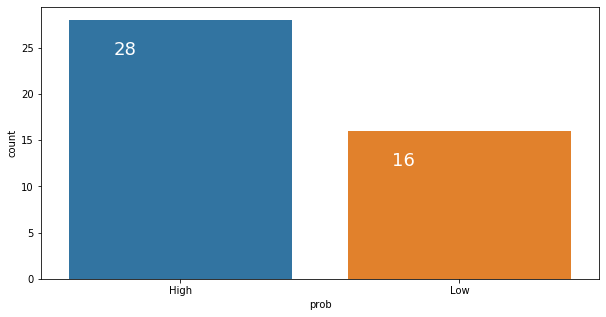

In [47]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x ='prob', data = osm_no_overlap)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

# validated new dataset from Mongolia

In [48]:
mn_new = pd.read_csv('d2/new_mn_data.csv',low_memory=False,encoding='utf-8')

In [49]:
mn_new.columns

Index(['sn', 'school_id', 'school_name', 'education_level', 'BUILDING_ID',
       'BUILDING_NAME', 'longitude', 'latitude', 'Internet_availibility',
       'internet_type', 'school_region', 'SOUM_DISTRICT_NAME',
       'BAG_KHOROO_NAME', 'school_type', 'LOCATION_TYPE', 'class_room_count',
       'LAST_UPDATED_BY', 'LAST_UPDATE_DATE', 'original_index', 'point_id',
       'conf_efficientnet', 'conf_yolov5', 'conf_detr'],
      dtype='object')

In [51]:
len(mn_new)

3612

In [52]:
mn_new_d = mn_new.groupby(['school_id','school_name', 'education_level']).agg({
                                                                              'point_id': 'nunique'}).reset_index()

In [53]:
mn_new_d.head(10)

,school_id,school_name,education_level,point_id
0,39623.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð­Ñ€Ð´ÑÐ½ÑÐ±...,High school,1
1,39625.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð“ÑƒÑ€Ð²Ð°Ð½ Ñ...,High school,1
2,39626.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð­Ñ€Ð´ÑÐ½ÑÐ¼...,High school,5
3,39627.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð¦ÑÑ†ÑÑ€Ð»Ñ...,High school,4
4,39628.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð¥Ð°ÑˆÐ°Ð°Ñ‚ Ñ...,High school,4
5,39629.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð­Ñ€Ð´ÑÐ½ÑÐ±...,High school,1
6,39630.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð‘Ð°Ñ‚Ñ†ÑÐ½Ð³...,High school,3
7,39631.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð‘ÑƒÐ»Ð³Ð°Ð½ Ñ...,Secondary school,2
8,39632.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð˜Ñ…Ñ‚Ð°Ð¼Ð¸Ñ€...,High school,4
9,39633.0,ÐÑ€Ñ…Ð°Ð½Ð³Ð°Ð¹ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ð–Ð°Ñ€Ð³Ð°Ð»Ð°...,High school,3


In [54]:
#duplicates
df_dup = mn_new.groupby(['school_id','school_name', 'education_level'])

In [56]:
df_dup.head()

,sn,school_id,school_name,education_level,BUILDING_ID,BUILDING_NAME,longitude,latitude,Internet_availibility,internet_type,...,school_type,LOCATION_TYPE,class_room_count,LAST_UPDATED_BY,LAST_UPDATE_DATE,original_index,point_id,conf_efficientnet,conf_yolov5,conf_detr
0,1,39884.0,Ð¡Ò¯Ñ…Ð±Ð°Ð°Ñ‚Ð°Ñ€ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ ÐµÑ€Ó©Ð½Ñ…Ð¸...,High school,350,1-Ñ€ Ð±Ð°Ð¹Ñ€,113.283920,46.681740,Yes,FTPCABLE,...,Government,PROVINCE,26.0,GS3210110030,36:59.0,0,gov_1,0.999984,0.856392,0.989029
1,2,39884.0,Ð¡Ò¯Ñ…Ð±Ð°Ð°Ñ‚Ð°Ñ€ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ ÐµÑ€Ó©Ð½Ñ…Ð¸...,High school,"100,000,080,551,745",2-Ñ€ Ð±Ð°Ð¹Ñ€,113.284133,46.682344,Yes,UTPCABLE,...,Government,PROVINCE,8.0,GS3210110030,55:42.0,1,gov_2,0.899807,0.706563,0.000000
2,3,40285.0,ÐÐ¸Ð¹ÑÐ»ÑÐ»Ð¸Ð¹Ð½ ÐµÑ€Ó©Ð½Ñ…Ð¸Ð¹ Ð±Ð¾Ð»Ð¾Ð²...,High school,"100,000,942,193,313",Ð´Ð¾Ñ‚ÑƒÑƒÑ€ Ð±Ð°Ð¹Ñ€,107.249070,47.772220,No,Not connected,...,"Private, Mongolian citizenship owner",CAPITAL_CITY,NaN,GS3210110002,14:53.0,2,gov_3,0.000011,0.000000,0.571278
3,4,40285.0,ÐÐ¸Ð¹ÑÐ»ÑÐ»Ð¸Ð¹Ð½ ÐµÑ€Ó©Ð½Ñ…Ð¸Ð¹ Ð±Ð¾Ð»Ð¾Ð²...,High school,815,Ð§Ð°Ð½Ð´Ð¼Ð°Ð½ÑŒ-Ð­Ñ€Ð´ÑÐ½Ñ,107.249800,47.771820,No,Not connected,...,"Private, Mongolian citizenship owner",CAPITAL_CITY,10.0,GS3210110002,06:24.0,3,gov_4,0.852404,0.101763,0.514813
4,5,43861.0,158-Ñ€ Ñ†ÑÑ†ÑÑ€Ð»ÑÐ³,Kindergarten,"100,000,289,478,487",Ð¦ÑÑ†ÑÑ€Ð»ÑÐ³Ð¸Ð¹Ð½ Ð±Ð°Ð¹Ñ€,106.805681,47.960280,No,Not connected,...,Government,CAPITAL_CITY,9.0,GS3210110013,42:14.0,4,gov_5,0.002680,0.000000,0.812503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,3608,40166.0,Ð£Ð²Ñ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ó¨Ð¼Ð½Ó©Ð³Ð¾Ð²ÑŒ ÑÑƒÐ¼Ñ...,High school,"100,000,938,701,655",Ð¥Ð¸Ñ‡ÑÑÐ»Ð¸Ð¹Ð½ Ð±Ð°Ð¹Ñ€-3 Ð£Ð»Ð¸Ð°ÑÑ‚ Ð±...,91.264286,48.930056,No,Not connected,...,Government,SOUM,4.0,GS3210110011,26:13.0,3607,gov_3608,0.000007,0.000000,0.000000
3608,3609,40166.0,Ð£Ð²Ñ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ó¨Ð¼Ð½Ó©Ð³Ð¾Ð²ÑŒ ÑÑƒÐ¼Ñ...,High school,"100,000,302,780,762",Ð¥Ð¸Ñ‡ÑÑÐ»Ð¸Ð¹Ð½ Ð±Ð°Ð¹Ñ€-2,91.715294,49.107309,Yes,FTPCABLE,...,Government,SOUM,11.0,GS3210110011,26:51.0,3608,gov_3609,0.999398,0.809339,0.980725
3609,3610,40166.0,Ð£Ð²Ñ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ó¨Ð¼Ð½Ó©Ð³Ð¾Ð²ÑŒ ÑÑƒÐ¼Ñ...,High school,"100,000,085,315,090",ÑÐ¼ÑÐ³Ñ‚ÑÐ¹ Ð´Ð¾Ñ‚ÑƒÑƒÑ€ Ð±Ð°Ð¹Ñ€,91.715353,49.107934,No,Not connected,...,Government,SOUM,NaN,GS3210110011,32:56.0,3609,gov_3610,0.998476,0.233319,0.000000
3610,3611,40166.0,Ð£Ð²Ñ Ð°Ð¹Ð¼Ð³Ð¸Ð¹Ð½ Ó¨Ð¼Ð½Ó©Ð³Ð¾Ð²ÑŒ ÑÑƒÐ¼Ñ...,High school,"100,000,085,315,399",ÑÑ€ÑÐ³Ñ‚ÑÐ¹ Ð´Ð¾Ñ‚ÑƒÑƒÑ€ Ð±Ð°Ð¹Ñ€,91.716222,49.107685,No,Not connected,...,Government,SOUM,NaN,GS3210110011,33:14.0,3610,gov_3611,0.999115,0.000000,0.844786


In [57]:
# adding probabality class

mn_new['class'] = np.where((mn_new['conf_yolov5']<0.5) & (mn_new['conf_detr']<0.5)& (mn_new['conf_efficientnet']<0.5), 'low', 'high')

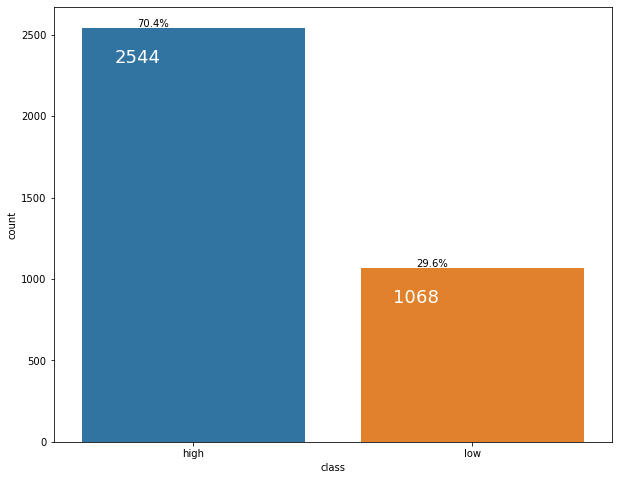

In [58]:
# ploting the high and low probablity classes

plt.figure(figsize=(10,8))
ax = sns.countplot(x ='class', data = mn_new)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(mn_new)), (p.get_x()+0.2, p.get_height()+5))

In [195]:
# saving the high and low prob classes
mn_high_p = mn_new[mn_new['class']=='high']
mn_low_p = mn_new[mn_new['class']=='low']
mn_high_p.to_csv("d2/mn_high_p.csv", index = False)
mn_low_p.to_csv("d2/mn_low_p.csv", index = False)
mn_new.to_csv("d2/mn_new.csv", index = False)

# Analysis for data points on the same building but with different prob classes

# cluster by 15m

In [59]:
# importing the clustered dataset, clustering done in another notebook
mn_cluster = pd.read_csv('d2/gov_cluster.csv',low_memory=False,encoding='utf-8')

In [60]:
# adding prob class
mn_cluster['class'] = np.where((mn_cluster['conf_yolov5']<0.5) & (mn_cluster['conf_detr']<0.5)& (mn_cluster['conf_efficientnet']<0.5), 'low', 'high')

In [61]:
# viewing the colunms
mn_cluster.columns

Index(['school_id', 'school_name', 'education_level', 'BUILDING_ID',
       'BUILDING_NAME', 'longitude', 'latitude', 'Internet_availibility',
       'internet_type', 'school_region', 'SOUM_DISTRICT_NAME',
       'BAG_KHOROO_NAME', 'school_type', 'LOCATION_TYPE', 'class_room_count',
       'LAST_UPDATED_BY', 'LAST_UPDATE_DATE', 'original_index', 'point_id',
       'top', 'left', 'bottom', 'right', 'conf_efficientnet', 'conf_yolov5',
       'conf_detr', 'cluster_id', 'class'],
      dtype='object')

In [62]:
# grouping by the common variables and counting number of classes per group
mn_cluster_c = mn_cluster.groupby(['school_id','school_name', 'education_level','cluster_id']).agg({
                                                                              'class': 'nunique'}).reset_index()

In [63]:
mn_cluster_c.head(10)

,school_id,school_name,education_level,cluster_id,class
0,39623.0,Архангай аймгийн Эрдэнэбулган сумын ерөнхий бо...,High school,-1.0,1
1,39625.0,Архангай аймгийн Гурван тамир коллеж,High school,-1.0,1
2,39626.0,Архангай аймгийн Эрдэнэмандал сумын ерөнхий бо...,High school,-1.0,1
3,39626.0,Архангай аймгийн Эрдэнэмандал сумын ерөнхий бо...,High school,134.0,1
4,39627.0,Архангай аймгийн Цэцэрлэг сумын ерөнхий боловс...,High school,-1.0,1
5,39627.0,Архангай аймгийн Цэцэрлэг сумын ерөнхий боловс...,High school,220.0,1
6,39627.0,Архангай аймгийн Цэцэрлэг сумын ерөнхий боловс...,High school,263.0,1
7,39628.0,Архангай аймгийн Хашаат сумын ерөнхий боловсро...,High school,-1.0,1
8,39628.0,Архангай аймгийн Хашаат сумын ерөнхий боловсро...,High school,59.0,1
9,39629.0,Архангай аймгийн Эрдэнэбулган сумын ерөнхий бо...,High school,-1.0,1


In [64]:
# instances where there are more than one point on a building or 15m close to each other
dup = mn_cluster[mn_cluster['cluster_id']!=-1]

In [65]:
# 1100 instances, i.e. duplicates
len(dup)

1100

In [66]:
# instances where there are no close points, one point per building
no_dup = mn_cluster[mn_cluster['cluster_id']==-1]

In [67]:
#2513 instances i.e. no duplicates
len(no_dup)

2513

# group of points on a building or close to each yet with different prob classes

In [68]:
# groups of points on the same building and having mixed classes
g = mn_cluster_c[(mn_cluster_c['class'] >1) & (mn_cluster_c['cluster_id'] !=-1) & (mn_cluster_c['cluster_id'] !=61)]

In [69]:
# they are 25 instances
g.shape


(23, 5)

In [70]:
g = g.sort_values('school_id')

In [71]:
g.head(23) 


,school_id,school_name,education_level,cluster_id,class
205,39780.0,Увс аймгийн Наранбулаг сумын ерөнхий боловсрол...,High school,6.0,2
245,39811.0,Хэнтий аймгийн Бор-Өндөр сумын ерөнхий боловср...,Complex school,246.0,2
639,40148.0,Хэнтий аймгийн Хэрлэн сумын Өлзийт тосгоны ерө...,High school,253.0,2
724,40213.0,Завхан аймгийн Их-Уул сумын ерөнхий боловсролы...,High school,261.0,2
852,40325.0,Ховд аймгийн Мөнххайрхан сумын ерөнхий боловср...,High school,268.0,2
1042,42713.0,Баяндэлгэр сумын цэцэрлэг,Kindergarten,94.0,2
1056,42727.0,3-р цэцэрлэг,Kindergarten,278.0,2
1154,42851.0,200-р цэцэрлэг,Kindergarten,22.0,2
1496,43245.0,Цэнхэрмандал сумын цэцэрлэг,Kindergarten,137.0,2
1526,43274.0,Батширээт сумын цэцэрлэг,Kindergarten,36.0,2


In [72]:
# a look at an instance
df_clus = mn_cluster.groupby(['cluster_id'])

In [83]:
#246 group
df_clus.get_group(246).head()

,school_id,school_name,education_level,BUILDING_ID,BUILDING_NAME,longitude,latitude,Internet_availibility,internet_type,school_region,...,point_id,top,left,bottom,right,conf_efficientnet,conf_yolov5,conf_detr,cluster_id,class
3478,39812.0,Хэнтий аймгийн Батноров сумын Бэрх тосгоны ерө...,High school,"100,000,452,929,297",Бага сургууль \Хуучин\,109.42583,46.25499,No,Not connected,Хэнтий,...,gov_2344,46.255944,109.42445,46.254036,109.42721,0.781683,0.0,0.899285,246.0,high
3479,39812.0,Хэнтий аймгийн Батноров сумын Бэрх тосгоны ерө...,High school,239,2-байр,109.42583,46.25499,No,Not connected,Хэнтий,...,gov_2346,46.255944,109.42445,46.254036,109.42721,0.781683,0.0,0.899285,246.0,high
3480,39811.0,Хэнтий аймгийн Бор-Өндөр сумын ерөнхий боловср...,Complex school,236,Ахлах сургууль,109.42586,46.25502,Yes,FTPCABLE,Хэнтий,...,gov_3602,46.255974,109.42448,46.254066,109.42724,0.034367,0.0,0.000000,246.0,low
3481,39811.0,Хэнтий аймгийн Бор-Өндөр сумын ерөнхий боловср...,Complex school,237,Дунд сургууль,109.42591,46.25502,No,FTPCABLE,Хэнтий,...,gov_3603,46.255974,109.42453,46.254066,109.42729,0.012527,0.0,0.961618,246.0,high
3482,39811.0,Хэнтий аймгийн Бор-Өндөр сумын ерөнхий боловср...,Complex school,"100,000,606,899,019",Бага сургууль,109.42583,46.25499,Yes,FTPCABLE,Хэнтий,...,gov_3604,46.255944,109.42445,46.254036,109.42721,0.781683,0.0,0.899285,246.0,high
